In [1]:
'''

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

.) The training set should be used to build your machine learning models.
For the training set, we provide the outcome (also known as the “ground truth”) for each passenger.
Your model will be based on “features” like passengers’ gender and class. 
You can also use feature engineering to create new features.

.) The test set should be used to see how well your model performs on unseen data. 
For the test set, we do not provide the ground truth for each passenger. 
It is your job to predict these outcomes. For each passenger in the test set, 
use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all 
and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings(بہن بھائی) / spouses(میاں بیوی) aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	                                                                   
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

'''

'\n\nOverview\nThe data has been split into two groups:\n\ntraining set (train.csv)\ntest set (test.csv)\n\n.) The training set should be used to build your machine learning models.\nFor the training set, we provide the outcome (also known as the “ground truth”) for each passenger.\nYour model will be based on “features” like passengers’ gender and class. \nYou can also use feature engineering to create new features.\n\n.) The test set should be used to see how well your model performs on unseen data. \nFor the test set, we do not provide the ground truth for each passenger. \nIt is your job to predict these outcomes. For each passenger in the test set, \nuse the model you trained to predict whether or not they survived the sinking of the Titanic.\n\nWe also include gender_submission.csv, a set of predictions that assume all \nand only female passengers survive, as an example of what a submission file should look like.\n\nData Dictionary\nVariable\tDefinition\tKey\nsurvival\tSurvival\t

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv(r'C:\Users\mohsi\OneDrive\Pictures\Titanic Data Analysis\train.csv')
test_df = pd.read_csv(r'C:\Users\mohsi\OneDrive\Pictures\Titanic Data Analysis\test.csv')
combine = [train_df, test_df]

##                               Analyze by describing data

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# The info() method prints information about the DataFrame. The information contains the number of columns,
# column labels, column data types, memory usage, range index, and the number of cells in each column 
# (non-null values). 
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [8]:
# it pulls out the objects dtypes attributes(خصوصیات) and shows their count/frequency/max/quartiles(چوتھائی)
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


##                           Analyze by pivoting features

In [9]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values('Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values('Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


##                          Analyze by visualizing data

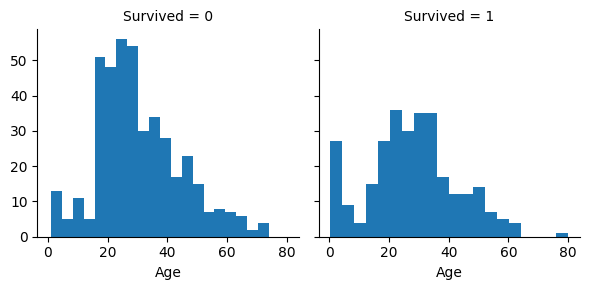

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age',bins=20)

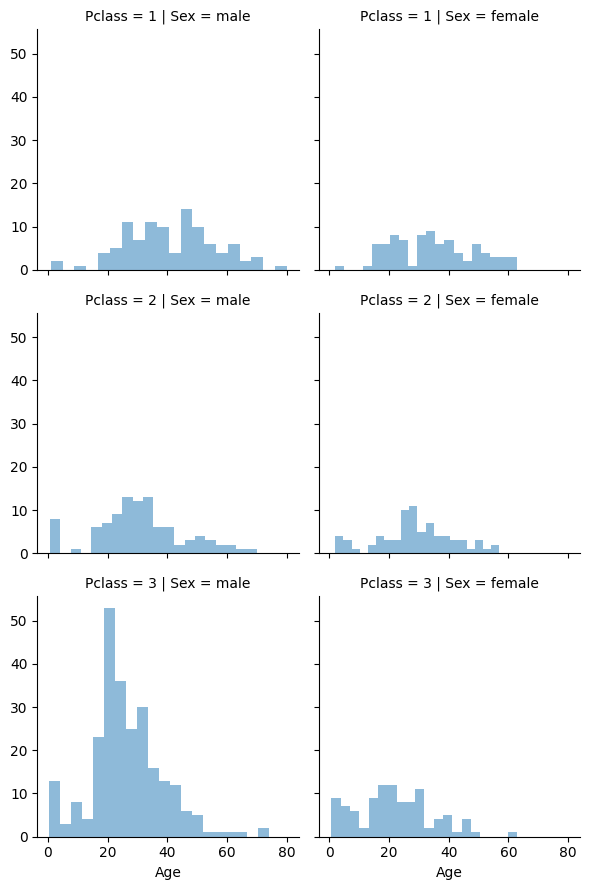

In [13]:
# alpha is used to manage colors
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age', alpha= .5, bins=20)

C:\Users\mohsi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mohsi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


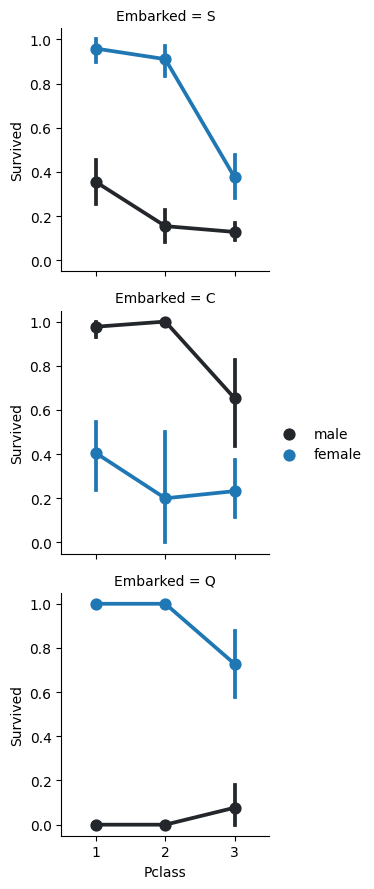

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass','Survived','Sex')
grid.add_legend()

C:\Users\mohsi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


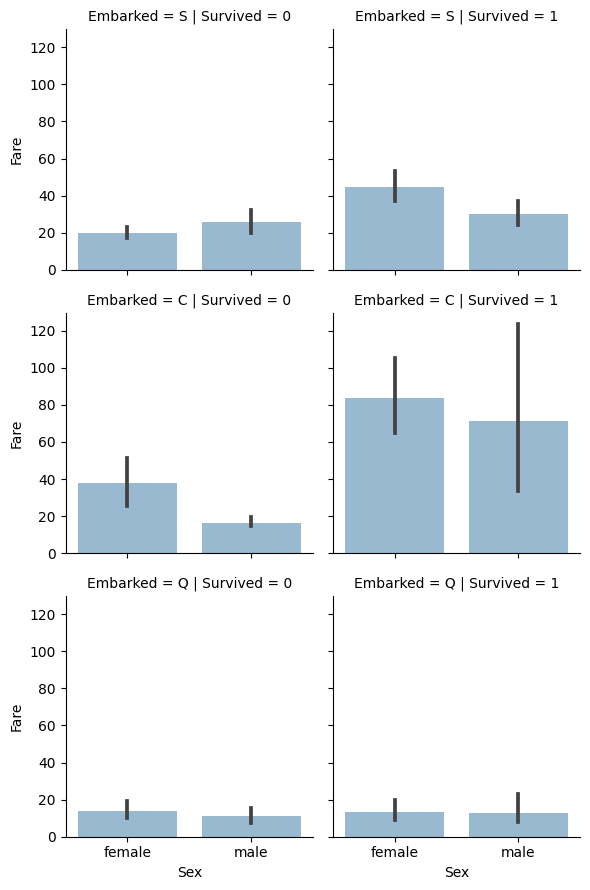

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked',col='Survived')
grid.map(sns.barplot, 'Sex','Fare', alpha=.5)

In [16]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Fare','Embarked'], axis=1)
test_df = test_df.drop(['Fare','Embarked'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-z]+)\.')
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
title_mapping = {"Mr": 1, "Miss": 3, "Mrs": 5, "Master": 9, "Rare": 12}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,1


In [20]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Title
0,0,3,0,22.0,1,0,A/5 21171,NaN,1
1,1,1,1,38.0,1,0,PC 17599,C85,5
2,1,3,1,26.0,0,0,STON/O2. 3101282,NaN,3
3,1,1,1,35.0,1,0,113803,C123,5
4,0,3,0,35.0,0,0,373450,NaN,1


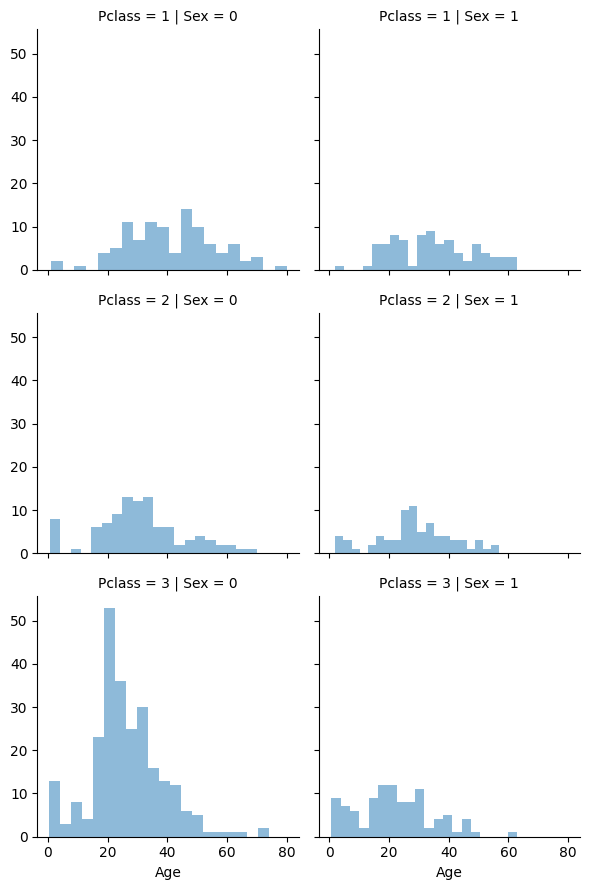

In [22]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

In [23]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [24]:
# cut is used to separate the array elements into different bins
# e.g ;  Let’s say we have an array of 10 random numbers from 1 to 100 and we wish to separate data into
# 5 bins of (1,20) , (20,40) , (40,60) ,  (60,80) , (80,100).
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['Survived','AgeBand']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [25]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
    dataset.loc[dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Title,AgeBand
0,0,3,0,1.0,1,0,A/5 21171,NaN,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,PC 17599,C85,5,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,STON/O2. 3101282,NaN,3,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,113803,C123,5,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,373450,NaN,1,"(32.252, 48.168]"


In [26]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Title
0,0,3,0,1.0,1,0,A/5 21171,NaN,1
1,1,1,1,2.0,1,0,PC 17599,C85,5
2,1,3,1,1.0,0,0,STON/O2. 3101282,NaN,3
3,1,1,1,2.0,1,0,113803,C123,5
4,0,3,0,2.0,0,0,373450,NaN,1


In [27]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values('Survived',
                                                                                    ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [28]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [29]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Title,IsAlone
0,0,3,0,1.0,A/5 21171,NaN,1,0
1,1,1,1,2.0,PC 17599,C85,5,0
2,1,3,1,1.0,STON/O2. 3101282,NaN,3,1
3,1,1,1,2.0,113803,C123,5,0
4,0,3,0,2.0,373450,NaN,1,1


In [30]:
# [: means selecting all rows]
for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass
train_df.loc[:, ['Age*Pclass', 'Age', 'Pclass']].head(10)

,Age*Pclass,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,NaN,NaN,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2
